In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()

/cluster/apps/nss/gcc-6.3.0/python/3.7.4/x86_64/lib64/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'/cluster/home/kamara/Explain/exp_synthetic'

In [22]:
dir = '/cluster/home/kamara/Explain/csv/'

expe = "syn6"


jsonpath = f'/cluster/home/kamara/Explain/config_{expe}.json'
ranges = get_param_ranges(jsonpath)

df_syn1 = pd.read_csv(os.path.join(dir, f'{expe}_gpu1.csv'), index_col = 0)
res = df_syn1.groupby(by=['sparsity', 'explainer_name']).mean()
res

num_test_nodes  gpu  f1_score_top  recall_top  \
sparsity explainer_name                                                  
0.700    distance                 200.0  1.0      0.724667       0.724   
         gnnexplainer             200.0  1.0      0.211556       0.211   
         ig_node                  200.0  1.0      0.199222       0.198   
         occlusion                200.0  1.0      0.023000       0.023   
         pagerank                 200.0  1.0      0.663556       0.599   
         pgmexplainer             200.0  1.0      0.391778       0.371   
         random                   200.0  1.0      0.001000       0.001   
         sa_node                  200.0  1.0      0.113222       0.109   
0.990    distance                 200.0  1.0      0.724667       0.724   
         gnnexplainer             200.0  1.0      0.248778       0.248   
         ig_node                  200.0  1.0      0.199222       0.198   
         occlusion                200.0  1.0      0.023000       0.023   
         pagerank                 200.0  1.0      0.663556       0.599   
         pgmexplainer             200.0  1.0      0.384556       0.364   
         random                   200.0  1.0      0.002000       0.002   
         sa_node                  200.0  1.0      0.113222       0.109   
0.997    distance                 200.0  1.0      0.724667       0.724   
         gnnexplainer             200.0  1.0      0.199556       0.199   
         ig_node                  200.0  1.0      0.199222       0.198   
         occlusion                200.0  1.0      0.023000       0.023   
         pagerank                 200.0  1.0      0.663556       0.599   
         pgmexplainer             200.0  1.0      0.394222       0.374   
         random                   200.0  1.0      0.002000       0.002   
         sa_node                  200.0  1.0      0.113222       0.109   

                         precision_top     ged   auc_top  f1_score  recall  \
sparsity explainer_name                                                      
0.700    distance              0.72550   2.395  0.999050  0.010153   1.000   
         gnnexplainer          0.21225   5.940  0.974278  0.348243   0.998   
         ig_node               0.20075   3.840  0.409032  0.004620   0.410   
         occlusion             0.02300   4.920  0.030280  0.000306   0.025   
         pagerank              0.74425   1.490  0.999769  0.016750   1.000   
         pgmexplainer          0.41775   3.825  0.982725  0.055130   0.992   
         random                0.00100  10.715  0.512361  0.005215   0.527   
         sa_node               0.11850   4.690  0.109168  0.001372   0.109   
0.990    distance              0.72550   2.395  0.999050  0.267626   0.998   
         gnnexplainer          0.24975   6.185  0.971178  0.348878   0.775   
         ig_node               0.20075   3.840  0.409032  0.127721   0.380   
         occlusion             0.02300   4.920  0.030280  0.005547   0.023   
         pagerank              0.74425   1.490  0.999769  0.399600   0.999   
         pgmexplainer          0.41025   3.710  0.984609  0.269505   0.725   
         random                0.00200  10.580  0.506105  0.005064   0.022   
         sa_node               0.11850   4.690  0.109168  0.035720   0.109   
0.997    distance              0.72550   2.395  0.999050  0.728213   0.945   
         gnnexplainer          0.20025   6.195  0.973600  0.280075   0.399   
         ig_node               0.20075   3.840  0.409032  0.203939   0.238   
         occlusion             0.02300   4.920  0.030280  0.014833   0.023   
         pagerank              0.74425   1.490  0.999769  0.899091   0.989   
         pgmexplainer          0.41950   3.755  0.984630  0.453887   0.501   
         random                0.00200  10.675  0.510506  0.005000   0.008   
         sa_node               0.11850   4.690  0.109168  0.089706   0.109   

                         precision       auc  fidelity_acc+  fidelity_a

In [23]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa_node', 'ig_node'] :
      return('gradient')
    return('baseline')



df_syn1['type'] = df_syn1.apply(lambda row: explainer_type(row), axis=1)
df_syn1["1-fidelity_acc-"] = 1- df_syn1["fidelity_acc-"]
df_syn1["1-fidelity_prob-"] = 1- df_syn1["fidelity_prob-"]

### Recall vs precision - sparsity = 0.99

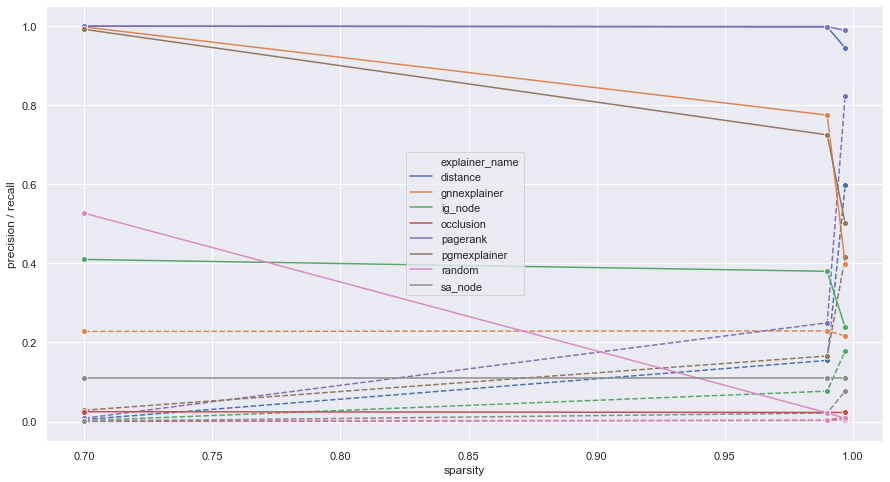

In [24]:
# Create a visualization


fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_syn1,
    x="sparsity", y="precision",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_syn1,
    x="sparsity", y="recall",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('precision / recall')
plt.show()


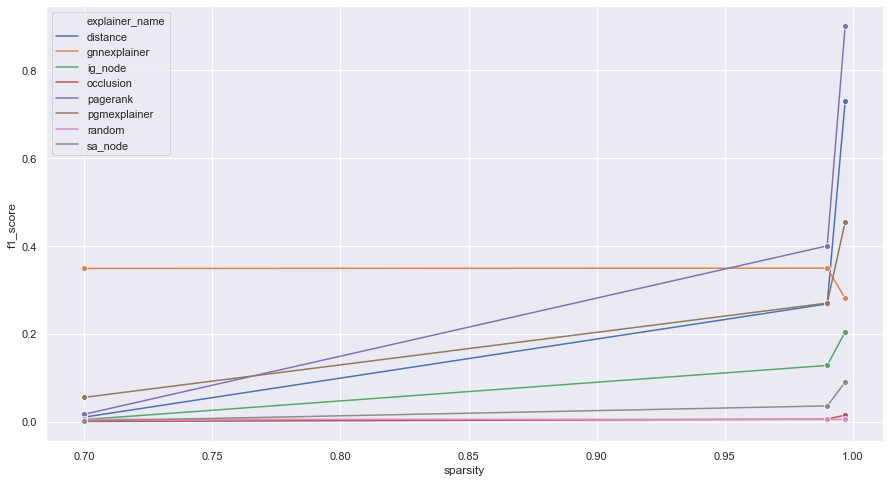

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_syn1,
    x="sparsity", y="f1_score",
    hue="explainer_name", marker="o", ax=ax)


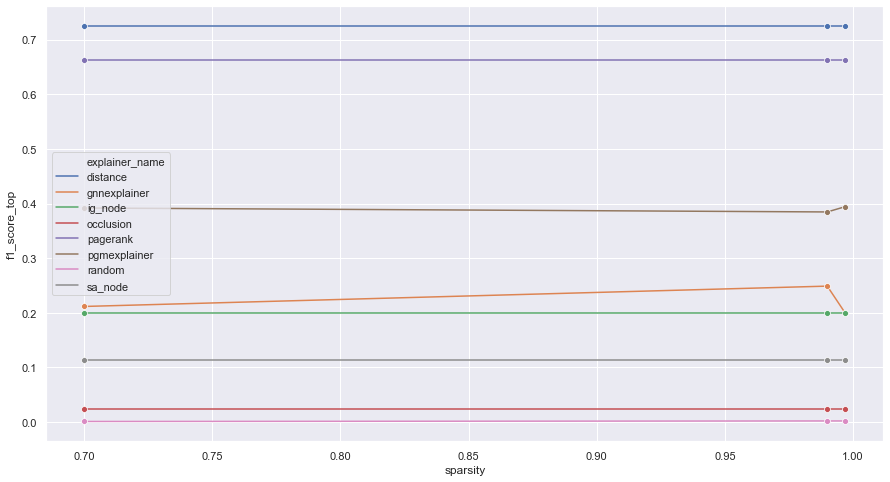

In [26]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(
    data=df_syn1,
    x="sparsity", y="f1_score_top",
    hue="explainer_name", marker="o", ax=ax)

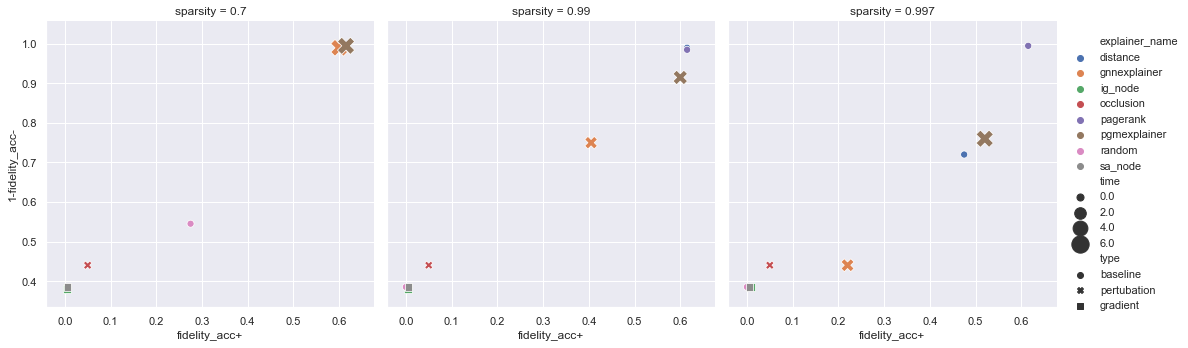

In [27]:
sns.set()

sns.relplot(
        data=df_syn1,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity",
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )


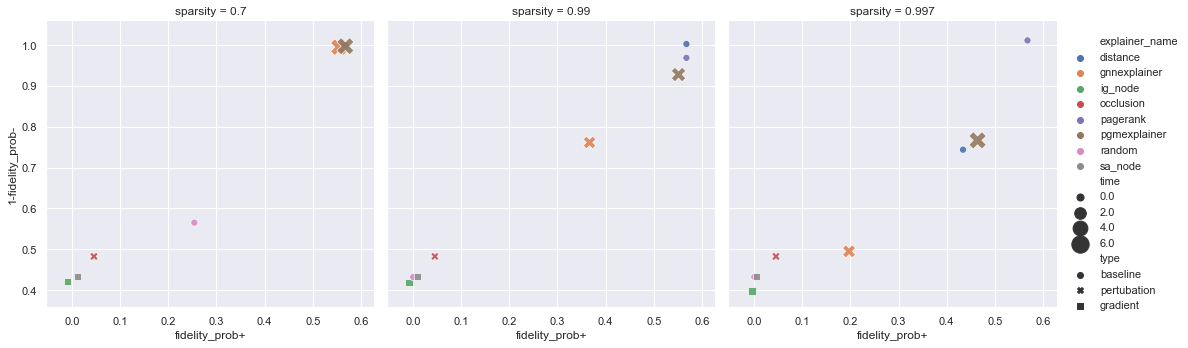

In [28]:
sns.relplot(
        data=df_syn1,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity",
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .9
    )

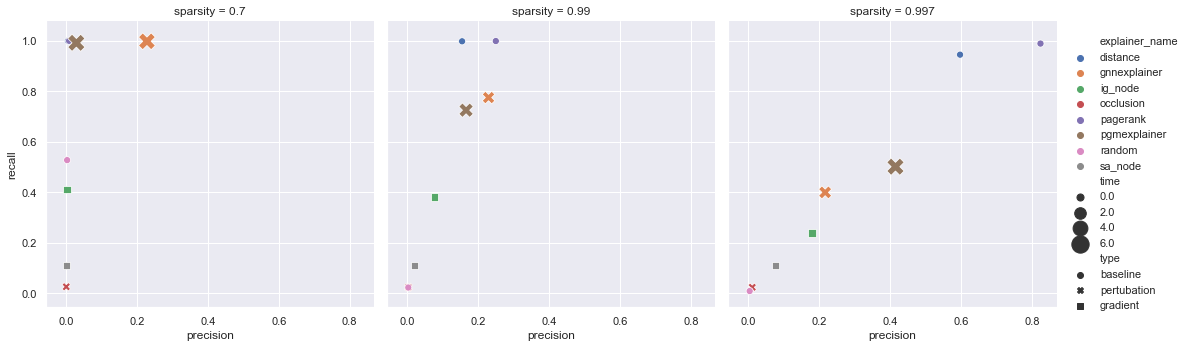

In [29]:
sns.relplot(
        data=df_syn1,
        x="precision", y="recall", col="sparsity",
        hue="explainer_name", size="time", sizes=(50, 300), style="type"
    )

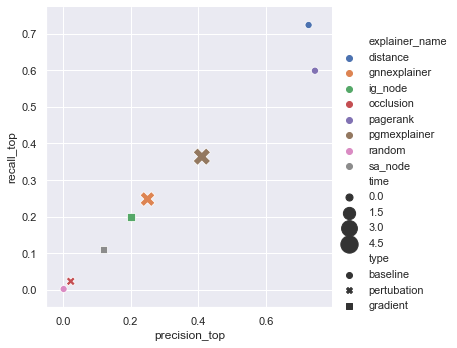

In [30]:
# Create a visualization
ax = sns.relplot(
    data=df_syn1[df_syn1.sparsity==0.99],
    x="precision_top", y="recall_top",
    hue="explainer_name", size="time", sizes=(50, 300), style="type"
)
